# ch10. mlp, keras intro

## 10.2 MLP with keras

### 10.2.1 MLP for Classification

In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[ : -5000], y_train_full[ : -5000]
X_valid, y_valid = X_train_full[-5000 : ], y_train_full[-5000 : ]

In [3]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [4]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [5]:
class_names[y_train[0]]

'Ankle boot'

In [6]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [9]:
history = model.fit(
    X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30


1719/1719 [==============================] - 3s 1ms/step - loss: 0.7290 - accuracy: 0.7597 - val_loss: 0.5107 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4922 - accuracy: 0.8297 - val_loss: 0.4660 - val_accuracy: 0.8306
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4444 - accuracy: 0.8447 - val_loss: 0.4280 - val_accuracy: 0.8494
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4192 - accuracy: 0.8531 - val_loss: 0.4015 - val_accuracy: 0.8586
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3985 - accuracy: 0.8603 - val_loss: 0.3957 - val_accuracy: 0.8584
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3820 - accuracy: 0.8660 - val_loss: 0.3939 - val_accuracy: 0.8592
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3694 - accuracy: 0.8697 - val_loss: 0.3755 - val_accurac

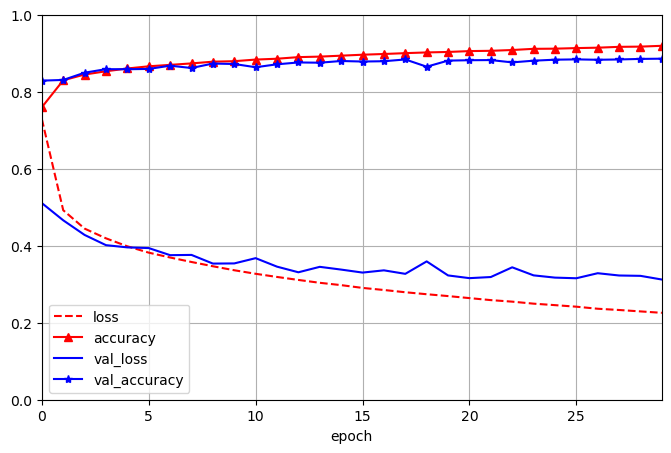

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1],
    grid=True, 
    xlabel="epoch", 
    style=["r--", "r-^", "b-", "b-*"]
)

plt.show()

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 771us/step - loss: 0.3228 - accuracy: 0.8848


[0.3228447139263153, 0.8848000168800354]

In [12]:
X_new = X_test[ : 3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 66ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [13]:
import numpy as np

In [14]:
X_new = X_test[ : 3]
y_proba = model.predict(X_new)
print(*[class_names[i.argmax()] for i in y_proba.round(2)])

1/1 [==============================] - 0s 14ms/step
Ankle boot Pullover Trouser


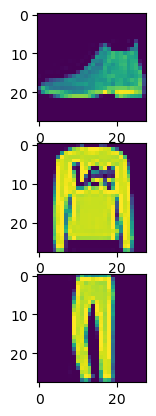

In [15]:
_, axes = plt.subplots(3)

for x, ax in zip(X_new, axes):
    ax.imshow(x)

### 10.2.2 MLP for regression

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [17]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [18]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1 : ])

model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)

In [19]:
history = model.fit(
    X_train, y_train, epochs=20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8373 - root_mean_squared_error: 0.9150 - val_loss: 0.4245 - val_root_mean_squared_error: 0.6515
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3830 - root_mean_squared_error: 0.6189 - val_loss: 0.8364 - val_root_mean_squared_error: 0.9145
Epoch 3/20
363/363 [==============================] - 0s 986us/step - loss: 0.3576 - root_mean_squared_error: 0.5980 - val_loss: 0.3215 - val_root_mean_squared_error: 0.5670
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3419 - root_mean_squared_error: 0.5847 - val_loss: 0.5877 - val_root_mean_squared_error: 0.7666
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3299 - root_mean_squared_error: 0.5744 - val_loss: 0.5638 - val_root_mean_squared_error: 0.7508
Epoch 6/20
363/363 [==============================] - 0s 998us/step - loss: 0.3206 - root_mean_squared_error: 0.5662 - val_loss: 0.3266 - 

In [20]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[ : 3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 62ms/step


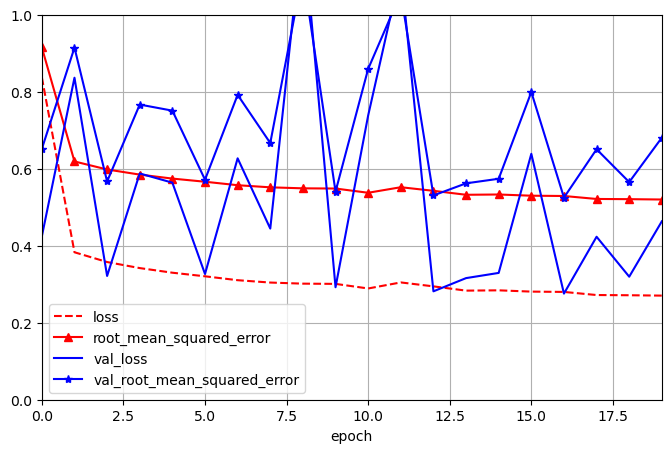

In [21]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 19], ylim=[0, 1],
    grid=True, 
    xlabel="epoch", 
    style=["r--", "r-^", "b-", "b-*"]
)

plt.show()

In [22]:
X_train.shape[1:]

(8,)

### 10.2.3 함수형 API, 와이드 앤 딥

In [23]:
norm_layer = tf.keras.layers.Normalization()

hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = norm_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [24]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

# optimizer
# compile(optimizer)
# norm adapt

# fit

In [25]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[ : , : 5], X_train[  : , 2:]
X_valid_wide, X_valid_deep = X_valid[ : , : 5], X_valid[  : , 2:]
X_test_wide, X_test_deep = X_test[ : , : 5], X_test[  : , 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep), y_train,
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), y_valid)
)

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2169 - root_mean_squared_error: 1.1031 - val_loss: 0.7314 - val_root_mean_squared_error: 0.8552
Epoch 2/20
363/363 [==============================] - 0s 999us/step - loss: 0.4619 - root_mean_squared_error: 0.6796 - val_loss: 1.1024 - val_root_mean_squared_error: 1.0500
Epoch 3/20
363/363 [==============================] - 0s 990us/step - loss: 0.4191 - root_mean_squared_error: 0.6474 - val_loss: 0.3961 - val_root_mean_squared_error: 0.6294
Epoch 4/20
363/363 [==============================] - 0s 995us/step - loss: 0.3962 - root_mean_squared_error: 0.6294 - val_loss: 0.6904 - val_root_mean_squared_error: 0.8309
Epoch 5/20
363/363 [==============================] - 0s 978us/step - loss: 0.3896 - root_mean_squared_error: 0.6242 - val_loss: 0.8043 - val_root_mean_squared_error: 0.8969
Epoch 6/20
363/363 [==============================] - 0s 977us/step - loss: 0.3809 - root_mean_squared_error: 0.6172 - val_loss: 2.2

#### 보조 출력 추가

In [26]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])

# 1. 보조 출력 정의 + 보조 출력이 받을 입력 지정
output = tf.keras.layers.Dense(1)(concat)
aux_ouptut = tf.keras.layers.Dense(1)(hidden2)

# 2. 모델의 outputs에 보조 출력 추가
model = tf.keras.Model(
    inputs=[input_wide, input_deep], 
    outputs=[output, aux_ouptut]
)

# 3. 이 외엔 동일

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[ : , : 5], X_train[  : , 2:]
X_valid_wide, X_valid_deep = X_valid[ : , : 5], X_valid[  : , 2:]
X_test_wide, X_test_deep = X_test[ : , : 5], X_test[  : , 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep), y_train,
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), y_valid)
)

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 2.9724 - dense_15_loss: 1.3888 - dense_16_loss: 1.5836 - dense_15_root_mean_squared_error: 1.1785 - dense_16_root_mean_squared_error: 1.2584 - val_loss: 2.3786 - val_dense_15_loss: 1.5704 - val_dense_16_loss: 0.8082 - val_dense_15_root_mean_squared_error: 1.2531 - val_dense_16_root_mean_squared_error: 0.8990
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1328 - dense_15_loss: 0.4936 - dense_16_loss: 0.6393 - dense_15_root_mean_squared_error: 0.7025 - dense_16_root_mean_squared_error: 0.7995 - val_loss: 1.9563 - val_dense_15_loss: 1.2023 - val_dense_16_loss: 0.7540 - val_dense_15_root_mean_squared_error: 1.0965 - val_dense_16_root_mean_squared_error: 0.8684
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0042 - dense_15_loss: 0.4466 - dense_16_loss: 0.5575 - dense_15_root_mean_squared_error: 0.6683 - dense_16_root_mean_squared_error: 0.7467 - val_loss: 1.275

## 10.3 신경망 하이퍼파라미터 튜닝 : keras_tuner

### 1. 구조와 관련된 하이퍼파라미터 튜닝(활성화 함수, 층 수, 뉴런 수 등)

In [30]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])

    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())

    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [31]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy",
    max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search",
    seed=42
)

In [32]:
random_search_tuner.search(
    X_train, y_train, epochs=10,
    validation_data=(X_valid, y_valid)
)

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.004392764996737242

Best val_accuracy So Far: 0.004392764996737242
Total elapsed time: 00h 00m 28s


### 찾아낸 최적 하이퍼파라미터 가져오기

In [33]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]
best_model

In [37]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 5,
 'n_neurons': 25,
 'learning_rate': 0.0006562536901904111,
 'optimizer': 'sgd'}

In [38]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial, best_trial.summary()

Trial 0 summary
Hyperparameters:
n_hidden: 5
n_neurons: 25
learning_rate: 0.0006562536901904111
optimizer: sgd
Score: 0.004392764996737242


(<keras_tuner.src.engine.trial.Trial at 0x24dccce5450>, None)

In [39]:
best_trial.metrics.get_last_value("val_accuracy")

0.004392764996737242

In [40]:
best_model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
484/484 [==============================] - 1s 810us/step - loss: 1.5337 - accuracy: 0.0033
Epoch 2/10
484/484 [==============================] - 0s 830us/step - loss: 1.5238 - accuracy: 0.0033
Epoch 3/10
484/484 [==============================] - 0s 777us/step - loss: 1.5184 - accuracy: 0.0032
Epoch 4/10
484/484 [==============================] - 0s 816us/step - loss: 1.5160 - accuracy: 0.0033
Epoch 5/10
484/484 [==============================] - 0s 819us/step - loss: 1.5142 - accuracy: 0.0033
Epoch 6/10
484/484 [==============================] - 0s 783us/step - loss: 1.5118 - accuracy: 0.0033
Epoch 7/10
484/484 [==============================] - 0s 768us/step - loss: 1.5126 - accuracy: 0.0033
Epoch 8/10
484/484 [==============================] - 0s 741us/step - loss: 1.5103 - accuracy: 0.0033
Epoch 9/10
484/484 [==============================] - 0s 766us/step - loss: 1.5102 - accuracy: 0.0033
Epoch 10/10
484/484 [==============================] - 0s 743us/step - loss: 1.510

In [41]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 697us/step - loss: 1.5050 - accuracy: 0.0021


### 훈련 기법과 관련된 하이퍼파라미터 찾기 : 훈련 데이터 표준화 유무, 배치 크기 등

In [42]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)

        return model.fit(X, y, **kwargs)

In [43]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), 
    objective="val_accuracy",
    seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband"
)

In [44]:
from pathlib import Path

In [45]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(
    X_train, y_train, epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb, tensorboard_cb]
)

Trial 60 Complete [00h 00m 04s]
val_accuracy: 0.004392764996737242

Best val_accuracy So Far: 0.005167958792299032
Total elapsed time: 00h 03m 10s


In [46]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), 
    objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="baysian_opt"
)

bayesian_opt_tuner.search(
    X_train, y_train, epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb, tensorboard_cb]
)

Trial 10 Complete [00h 00m 05s]
val_accuracy: 0.004134366754442453

Best val_accuracy So Far: 0.005167958792299032
Total elapsed time: 00h 00m 48s
